# Exoplanet Transits

A lab to explore ground-based transit light curves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Lets read in the data

In [2]:
#df = pd.read_csv("../data/data.txt",comment="#",delim_whitespace=True)
df = pd.read_csv("../data/transit.csv")
df[0:10]

,time,flux,error
0,2.457825e+06,1.001848,0.000577
1,2.457825e+06,1.000978,0.000573
2,2.457825e+06,1.000778,0.000573
3,2.457825e+06,1.000192,0.000568
4,2.457825e+06,1.001018,0.000568
5,2.457825e+06,0.999669,0.000568
6,2.457825e+06,1.001142,0.000568
7,2.457825e+06,0.999099,0.000563
8,2.457825e+06,1.000758,0.000568
9,2.457825e+06,1.000350,0.000568


### What date was this observation taken ?
Timestamp is in Barycentric Julian Dates, lets convert that to normal dates

In [3]:
from astropy.time import Time

In [4]:
T_0 = Time(df["time"].values[0],format="jd").iso
T_0 

'2017-03-12 08:46:25.248'

In [5]:
time = df["time"].values - df["time"].values[0] # Lets take out the time offset
flux = df["flux"].values
error = df["error"].values

### We can also plot with errorbars

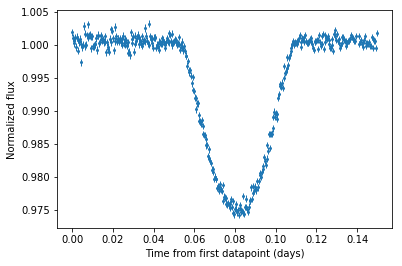

In [6]:
fig, ax = plt.subplots()
ax.errorbar(time,flux,error,lw=0,marker="o",elinewidth=1,markersize=2)
ax.set_xlabel("Time from first datapoint (days)")
ax.set_ylabel("Normalized flux")

# Lets import the transit modeling backage: Bad-Ass Transit Model cAlculatioN (BATMAN)

Documentation for BATMAN is here
- http://astro.uchicago.edu/~kreidberg/batman/

In [7]:
import batman

#### If you don't have batman you can install it by doing:

> pip install batman

in a terminal

#### Lets set up the transit model

In [8]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients
params.limb_dark = "quadratic"       #limb darkening model

In [9]:
# These are the times where the transit model will be evaluated
model_times = np.linspace(-0.05, 0.05, 100)

In [10]:
m = batman.TransitModel(params, model_times)    #initializes model
model_flux = m.light_curve(params)          #calculates light curve

#### Lets plot the transit model

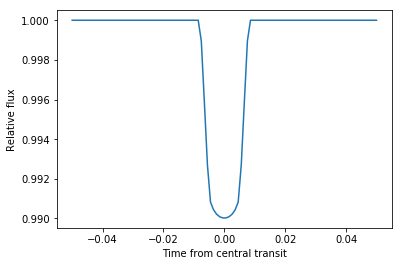

In [13]:
fig, ax = plt.subplots()
ax.plot(model_times, model_flux)
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux")

##### Now lets plot both of them on the same plot

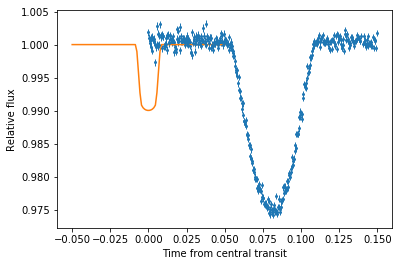

In [14]:
fig, ax = plt.subplots()
#
ax.errorbar(time,flux,error,lw=0,marker="o",elinewidth=1,markersize=2)
# Model
ax.plot(model_times, model_flux)
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux")

#### We see that they don't compere too well ! What can we change ?

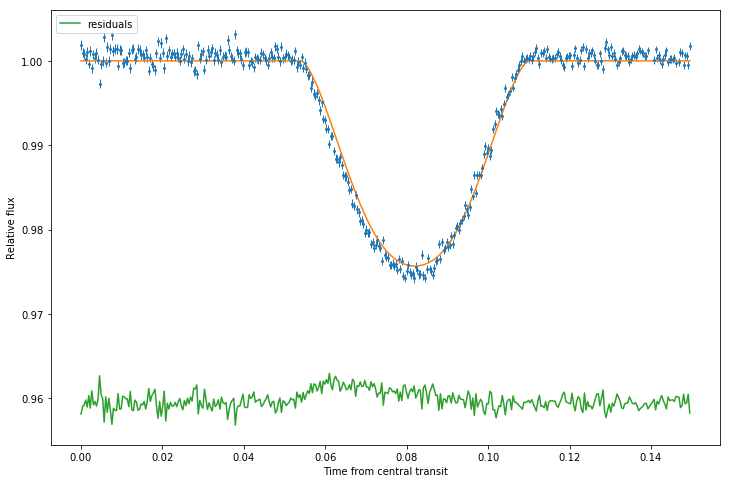

In [15]:
params = batman.TransitParams()
params.t0 = 0.082                     #time of inferior conjunction
params.per = 1.30618581               #orbital period
params.rp = 0.1660                    #planet radius (in units of stellar radii)
params.a = 6.0                        #semi-major axis (in units of stellar radii)
params.inc = 81.85                    #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.u = [0.3, 0.3]                 #limb darkening coefficients
params.limb_dark = "quadratic"        #limb darkening model

m = batman.TransitModel(params, time) #initializes model
model_flux = m.light_curve(params)          #calculates light curve

# Plotting
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(time,flux,error,lw=0,marker="o",elinewidth=1,markersize=2)
# Model
ax.plot(time, model_flux)
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux")

residuals = model_flux - flux
ax.plot(time,residuals+0.96,label="residuals")
ax.legend(loc="upper left")

- Planet is TRES-3b
- Parameters can be gotten from here: https://exoplanetarchive.ipac.caltech.edu/